## Performing EDA

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [196]:
agent = pd.read_parquet("./data/nus_agent_info_df.parquet")
policy = pd.read_parquet('./data/nus_policy_info_df.parquet')
client = pd.read_parquet('./data/nus_policy_info_df.parquet')
sample = pd.read_parquet('./data/sample_final_modelling_df.parquet')

In [197]:
policy['agntnum'] = policy['agntnum'].astype(str)
agent['agntnum'] = agent['agntnum'].astype(str)

In [198]:
# join on agent and policy on agent_num
# join result with client information on chdrnum and agent_num?
policy

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,PID:22084,AIN:6527,CIN:15419,2012-10-30,4574.4,prod_4,1,0,1,0,0,0,1,PG:1,AG09_55to59,TNR4_4to8yr
29499,PID:13706,AIN:3472,CIN:17337,2008-09-01,267.0,prod_6,1,0,1,0,0,0,1,PG:0,AG06_40to44,TNR2_lt1yr
29500,PID:25287,AIN:7852,CIN:13015,2000-06-21,0.0,prod_4,1,0,0,1,0,0,1,PG:1,AG08_50to54,TNR5_8yrup
29501,PID:26334,AIN:8316,CIN:2239,2010-06-10,1152.0,prod_8,1,0,1,0,0,0,1,PG:0,AG03_25to29,TNR4_4to8yr


In [199]:
policy.columns.difference(agent.columns)

Index(['annual_premium', 'chdrnum', 'cust_age_at_purchase_grp',
       'cust_tenure_at_purchase_grp', 'flg_cancel', 'flg_converted',
       'flg_expire', 'flg_inforce', 'flg_lapsed', 'flg_main', 'flg_rider',
       'occdate', 'product', 'product_grp', 'secuityno'],
      dtype='object')

In [200]:
cols_to_use = list(policy.columns.difference(agent.columns)) + ['agntnum']
df = agent.merge(
    policy[cols_to_use],
    on='agntnum'
)

df = df.merge(
    client,
    on=['chdrnum', 'agntnum']
)

In [201]:
df.head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,...,flg_main_y,flg_rider_y,flg_inforce_y,flg_lapsed_y,flg_cancel_y,flg_expire_y,flg_converted_y,product_grp_y,cust_age_at_purchase_grp_y,cust_tenure_at_purchase_grp_y
0,AIN:9513,32.0,M,M,15.0,21.0,10049.0,1.0,0.814954,0.000000,...,1,0,0,1,0,0,1,PG:0,AG08_50to54,TNR2_lt1yr
1,AIN:9513,32.0,M,M,15.0,21.0,10049.0,1.0,0.814954,0.000000,...,1,0,0,1,0,0,1,PG:0,AG08_50to54,TNR2_lt1yr
2,AIN:4310,40.0,M,M,18.0,396.0,197108.0,0.6,0.083937,0.429293,...,1,0,1,0,0,0,1,PG:0,AG06_40to44,TNR2_lt1yr
3,AIN:4310,40.0,M,M,18.0,396.0,197108.0,0.6,0.083937,0.429293,...,1,0,0,1,0,0,1,PG:0,AG03_25to29,TNR3_1to4yr
4,AIN:4310,40.0,M,M,18.0,396.0,197108.0,0.6,0.083937,0.429293,...,1,0,0,1,0,0,1,PG:0,AG04_30to34,TNR5_8yrup


In [202]:
df.columns

Index(['agntnum', 'agent_age', 'agent_gender', 'agent_marital', 'agent_tenure',
       'cnt_converted', 'annual_premium_cnvrt', 'pct_lapsed', 'pct_cancel',
       'pct_inforce', 'pct_prod_0_cnvrt', 'pct_prod_1_cnvrt',
       'pct_prod_2_cnvrt', 'pct_prod_3_cnvrt', 'pct_prod_4_cnvrt',
       'pct_prod_5_cnvrt', 'pct_prod_6_cnvrt', 'pct_prod_7_cnvrt',
       'pct_prod_8_cnvrt', 'pct_prod_9_cnvrt', 'pct_SX0_unknown',
       'pct_SX1_male', 'pct_SX2_female', 'pct_AG01_lt20', 'pct_AG02_20to24',
       'pct_AG03_25to29', 'pct_AG04_30to34', 'pct_AG05_35to39',
       'pct_AG06_40to44', 'pct_AG07_45to49', 'pct_AG08_50to54',
       'pct_AG09_55to59', 'pct_AG10_60up', 'cluster',
       'agent_product_expertise', 'annual_premium_x', 'chdrnum',
       'cust_age_at_purchase_grp_x', 'cust_tenure_at_purchase_grp_x',
       'flg_cancel_x', 'flg_converted_x', 'flg_expire_x', 'flg_inforce_x',
       'flg_lapsed_x', 'flg_main_x', 'flg_rider_x', 'occdate_x', 'product_x',
       'product_grp_x', 'secuityno_

In [203]:
# remove all suffixes from the columns: _x or _y

df.columns = ['agntnum', 'agent_age', 'agent_gender', 'agent_marital', 'agent_tenure',
       'cnt_converted', 'annual_premium_cnvrt', 'pct_lapsed', 'pct_cancel',
       'pct_inforce', 'pct_prod_0_cnvrt', 'pct_prod_1_cnvrt',
       'pct_prod_2_cnvrt', 'pct_prod_3_cnvrt', 'pct_prod_4_cnvrt',
       'pct_prod_5_cnvrt', 'pct_prod_6_cnvrt', 'pct_prod_7_cnvrt',
       'pct_prod_8_cnvrt', 'pct_prod_9_cnvrt', 'pct_SX0_unknown',
       'pct_SX1_male', 'pct_SX2_female', 'pct_AG01_lt20', 'pct_AG02_20to24',
       'pct_AG03_25to29', 'pct_AG04_30to34', 'pct_AG05_35to39',
       'pct_AG06_40to44', 'pct_AG07_45to49', 'pct_AG08_50to54',
       'pct_AG09_55to59', 'pct_AG10_60up', 'cluster',
       'agent_product_expertise', 'annual_premium', 'chdrnum',
       'cust_age_at_purchase_grp', 'cust_tenure_at_purchase_grp',
       'flg_cancel', 'flg_converted', 'flg_expire', 'flg_inforce',
       'flg_lapsed', 'flg_main', 'flg_rider', 'occdate', 'product',
       'product_grp', 'secuityno', 'secuityno_y', 'occdate_y',
       'annual_premium_y', 'product_', 'flg_main_y', 'flg_rider_y',
       'flg_inforce_y', 'flg_lapsed_y', 'flg_cancel_y', 'flg_expire_y',
       'flg_converted_y', 'product_grp_y', 'cust_age_at_purchase_grp_y',
       'cust_tenure_at_purchase_grp_y']

In [204]:
df = df.drop(
    columns=['secuityno_y', 'occdate_y',
       'annual_premium_y', 'product_', 'flg_main_y', 'flg_rider_y',
       'flg_inforce_y', 'flg_lapsed_y', 'flg_cancel_y', 'flg_expire_y',
       'flg_converted_y', 'product_grp_y', 'cust_age_at_purchase_grp_y',
       'cust_tenure_at_purchase_grp_y']
)

In [205]:
print_full(df.dtypes)

agntnum                                object
agent_age                             float64
agent_gender                           object
agent_marital                          object
agent_tenure                          float64
cnt_converted                         float64
annual_premium_cnvrt                  float64
pct_lapsed                            float64
pct_cancel                            float64
pct_inforce                           float64
pct_prod_0_cnvrt                      float64
pct_prod_1_cnvrt                      float64
pct_prod_2_cnvrt                      float64
pct_prod_3_cnvrt                      float64
pct_prod_4_cnvrt                      float64
pct_prod_5_cnvrt                      float64
pct_prod_6_cnvrt                      float64
pct_prod_7_cnvrt                      float64
pct_prod_8_cnvrt                      float64
pct_prod_9_cnvrt                      float64
pct_SX0_unknown                       float64
pct_SX1_male                      

In [206]:
# drop some columns as they do not provide any extra useful information
# flg_converted is always 1
# if flg_inforce == 1, flg_lapsed == 0
# flg_cancel is always == 0

df = df.drop(columns=['flg_converted', 'flg_lapsed', 'flg_cancel'])

In [207]:
df['match'] = df['flg_inforce'] # suppose that whether an agent is a match or not is dependent on whether policy is inforce
df['today'] = pd.to_datetime('2/2/2025')
df['policy_period'] = (df['today'] - df['occdate']).dt.days / 30 # use number of months for now

## Plot diagrams to visualize relationships

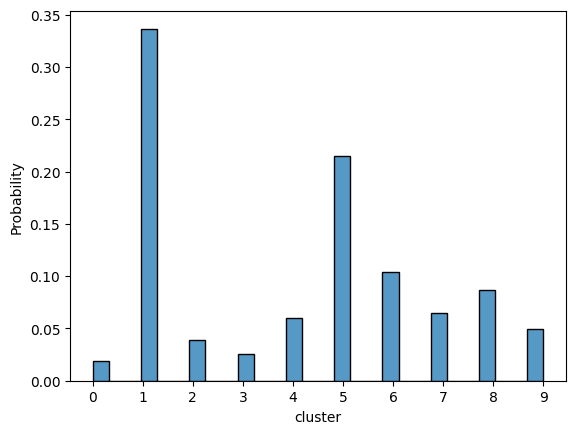

In [83]:
# distribution of agents across clusters
sns.histplot(
    df['cluster'],
    stat='probability'
)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

We can observe that we have an imbalanced dataset

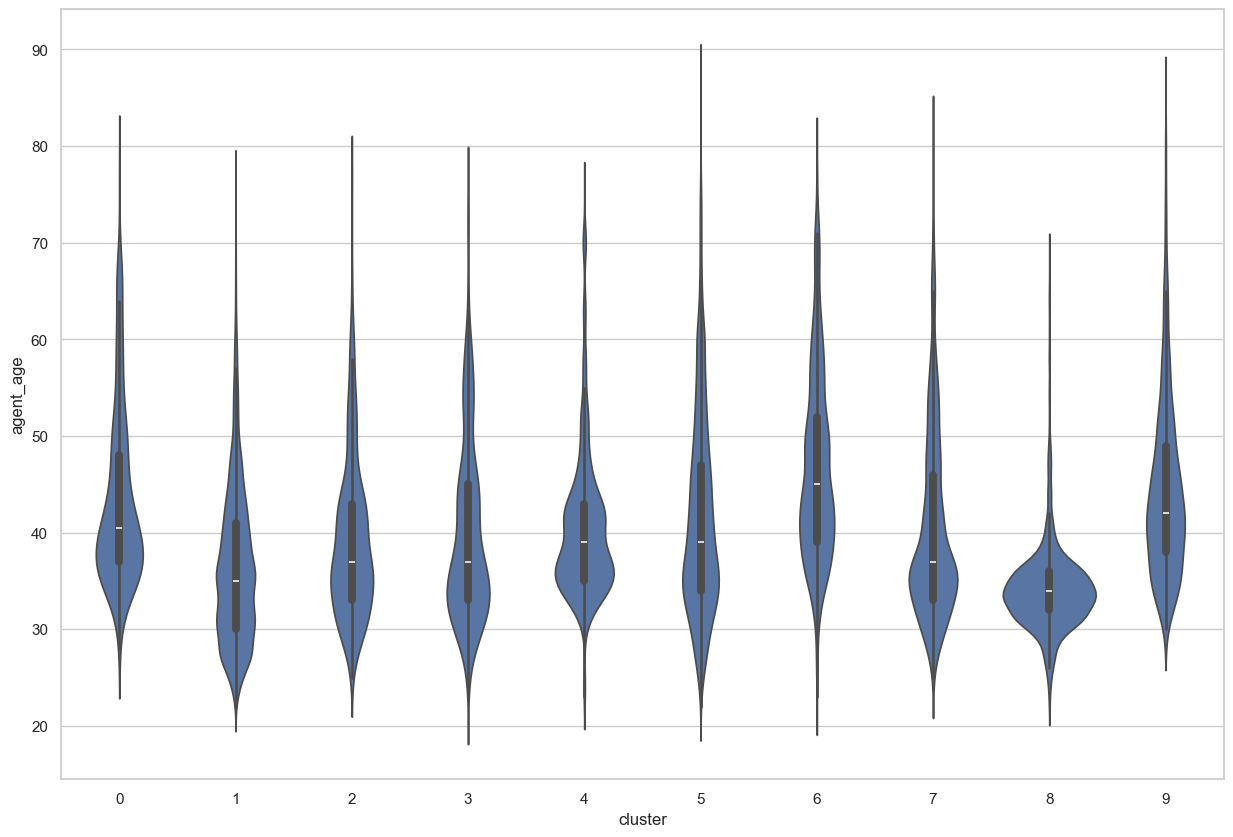

In [141]:
# determine if there is a relation between cluster (cetegorical variable) and age (continuous variable)
plt.figure(figsize=(15,10))

sns.violinplot(
    data=df,
    x='cluster',
    y='agent_age'
)

plt.show()


We can see that there is some variation of age of agents across all clusters

<Figure size 1500x1000 with 0 Axes>

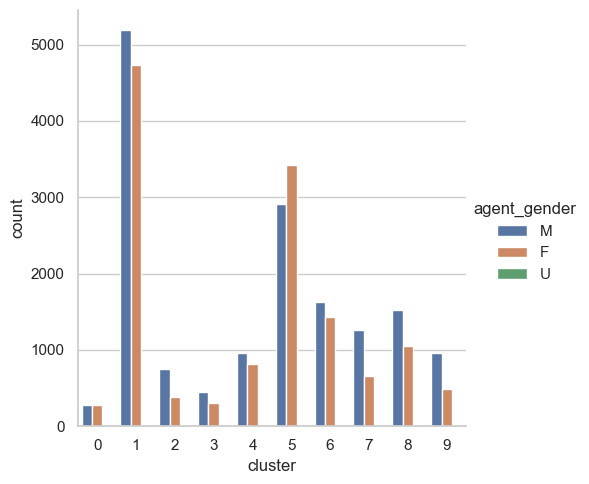

In [95]:
# what about relationship between agent's gender and the cluster?
# want 2 bars for each cluster that shows male and female
plt.figure(figsize=(15,10))

sns.catplot(
    data=df,
    kind='count',
    x='cluster',
    hue='agent_gender'
)

plt.show()

We can see number of males are usually higher across all clusters except 5. This could help us identify whether an agent belongs to cluster 5 or not

<Axes: xlabel='policy_period', ylabel='Density'>

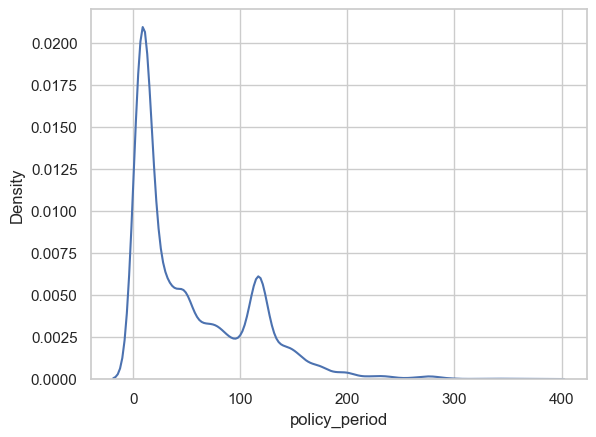

In [218]:
# check distribution of policy period
# TODO: issue now is that policy_period takes into account until today...
# we also dk when the policy was terminated

sns.kdeplot(
    data=df,
    x='policy_period'
)

In [96]:
# for a customer, recommend the best FA for him/her
# how do we know if the customer has the best FA?

In [ ]:
# suppose that in the policy table, if flg_converted == 1 then the agntnum and secuityno are a match (so put as 1)

In [142]:
policy['flg_converted'].value_counts()

flg_converted
1    29503
Name: count, dtype: int64